## Visualizing p2pHD Discriminator
based on: https://github.com/utkuozbulak/pytorch-cnn-visualizations

In [1]:
from torchvision import models
CUDA_VISIBLE_DEVICES = '6'

In [1]:
import sys
from importlib import reload
sys.path.append('/media/dataserver/workspace/blanca/utils')
import libraries
import utils_global
reload(utils_global)

from utils_global import *
%matplotlib inline

import torch
import torch.nn as nn
import functools
from networks import *
import sys
# project_models_path = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models'
# project_models_path = '/blanca/workspace/blanca/project/wip/pix2pixHDX-class-master/models'

di_v_path = '/media/dataserver/'
project_path = 'workspace/blanca/project/wip/pix2pixHDX-class-master'
sys.path.append(os.path.join(di_v_path, project_path))

# import models
from models import fitting_classifier
# from fitting_classifier 
from models.fitting_classifier import networks
reload(networks)

<module 'models.fitting_classifier.networks' from '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models/fitting_classifier/networks.py'>

In [2]:
from importlib import reload
from utils_global import *
%matplotlib inline

## TESTING IN P2PHD DISCRIMINATOR
import torch
import torch.nn as nn
import functools
from networks import *
import sys
# project_models_path = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models'
# project_models_path = '/blanca/workspace/blanca/project/wip/pix2pixHDX-class-master/models'

di_v_path = '/media/dataserver/'
project_path = 'workspace/blanca/project/wip/pix2pixHDX-class-master'
sys.path.append(os.path.join(di_v_path, project_path))

from models import networks_utils as networks

In [3]:
# VIS GAN
D_MODEL_PATH = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/checkpoints/test_X/200_net_D.pth'
G_MODEL_PATH = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/checkpoints/test_X/200_net_G.pth'
G_MODEL_PATH = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/checkpoints/clean_G_class_10_D/100_net_G.pth'
D_MODEL_PATH = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/checkpoints/clean_G_class_10_D/100_net_D.pth'

def define_G(input_nc, output_nc, ngf, n_downsample_global=4, n_blocks_global=9, n_local_enhancers=1,
             n_blocks_local=3, norm='instance'):

    norm_layer = functools.partial(nn.InstanceNorm2d, affine=False) #, track_running_stats=True)
    netG = GlobalGenerator(input_nc, output_nc, ngf, n_downsample_global, n_blocks_global, norm_layer)
    return netG

def define_D(input_nc, ndf, n_layers_D, norm='instance', use_sigmoid=False, num_D=2, getIntermFeat=True):
    
    norm_layer = functools.partial(nn.InstanceNorm2d, affine=False) #, track_running_stats=True)
    netD = MultiscaleDiscriminator(input_nc, ndf, n_layers_D, norm_layer, use_sigmoid, num_D, getIntermFeat)
    return netD

input_nc, output_nc, ngf, n_downsample_global, n_blocks_global, n_local_enhancers, n_blocks_local = 3, 3, 64, 4, 9, 1, 3
netG = define_G(input_nc, output_nc, ngf, n_downsample_global, n_blocks_global, n_local_enhancers, n_blocks_local)
netG.load_state_dict(torch.load(G_MODEL_PATH))

input_nc, ndf, n_layers_D, num_D = 6, 64, 3, 2
netD = define_D(input_nc, ndf, n_layers_D, num_D)
netD.load_state_dict(torch.load(D_MODEL_PATH))

criterionGAN = networks.GANLoss(use_lsgan=True, tensor=torch.Tensor)

In [4]:
# DATA
import torch.utils.data
from data.base_data_loader import BaseDataLoader

def CreateDataset(opt):
    dataset = None
    from data.aligned_dataset_custom import AlignedDataset
    import importlib
    import data
    importlib.reload(data)
    dataset = AlignedDataset()
    dataset.initialize(opt)
    print("dataset [%s] was created" % (dataset.name()))
    return dataset

class OptionsP2P():
    def __init__(self):
        self.batchSize = 1
        self.dataroot = '/media/dataserver/workspace/blanca/training_datasets/pix2pix/'
        self.dataset_list = ['images_target_clean_classified', 'video_target_clean_classified']
        self.isTrain = True
        self.label_nc = 0
        self.output_nc = 3
        self.loadSize = 256
        self.fill = 'W'
        self.no_lsgan = False
        self.serial_batches = False
        self.nThreads = 16
        self.max_dataset_size = 10e10

opt_data = OptionsP2P()
dataset = CreateDataset(opt_data)
print('#training images = %d' % len(dataset))

shuffling...done
shuffling...done
shuffling...done
2180
Total found IDs in path /media/dataserver/workspace/blanca/training_datasets/pix2pix/video_target_clean_classified/good_fit: 49 .. and selected 2 per ID
shuffling...done
2284
dataset [AlignedDataset] was created
#training images = 2284


input <class 'torch.FloatTensor'>
inst <class 'int'>
target <class 'torch.FloatTensor'>
feat <class 'int'>
target4C <class 'torch.FloatTensor'>
input_mask <class 'numpy.ndarray'>
path <class 'str'>
label <class 'torch.FloatTensor'>
(256, 256, 3) (256, 256, 3) (256, 256)


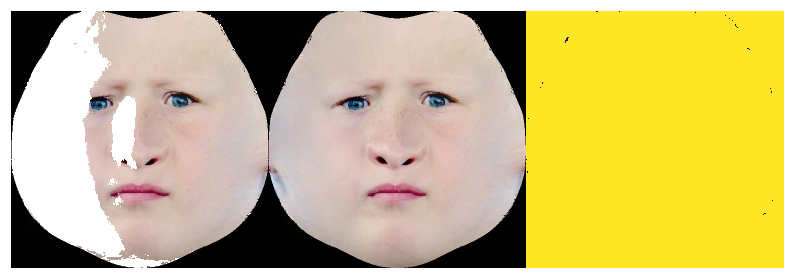

In [10]:
## VISUALIZING DATA
x = dataset.__get_x_item__(1)
for k, v in x.items(): print(k, type(v))

im_input = ((x['input'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
im_target = ((x['target'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
im_mask = x['input_mask']

print(im_input.shape, im_target.shape, im_mask.shape)
plot_ims([im_input, im_target, im_mask], alpha=True)

In [11]:
x_input = x['input'].expand(1, x['input'].shape[0], x['input'].shape[1], x['input'].shape[2])
x_target = x['target'].expand(1, x['target'].shape[0], x['target'].shape[1], x['target'].shape[2])
print(x_input.shape, x_target.shape)

input_D = Variable(torch.cat((x_input, x_target), dim=1), requires_grad=True)
print(type(input_D), input_D.shape)

torch.Size([1, 3, 256, 256]) torch.Size([1, 3, 256, 256])
<class 'torch.autograd.variable.Variable'> torch.Size([1, 6, 256, 256])


In [12]:
x = im_mask
# x = x / np.max(x)
print(np.min(x), np.max(x))

x= (x - np.mean(x)) / np.std(x)
print(np.min(x), np.max(x))
x = 2*(x - np.max(x))/-np.ptp(x)-1
print(np.min(x), np.max(x))
np.mean(x)

-1.0 1.0
-0.0262129226495 38.1491226053
-1.0 1.0


0.998626708984375

In [13]:
# output_D = netD(input_D)

# output of the discriminator is a list len == numD
# each D provides an output of size 5
# print(len(output_D[0]), len(output_D[1]))
# output = output_D[0][0].data.cpu().numpy()

# output_D[0][4]

## D1
# torch.Size([1, 64, 129, 129])
# torch.Size([1, 128, 65, 65])
# torch.Size([1, 256, 33, 33])
# torch.Size([1, 512, 34, 34])
# torch.Size([1, 1, 35, 35])

## D2
# torch.Size([1, 64, 65, 65])
# torch.Size([1, 128, 33, 33])
# torch.Size([1, 256, 17, 17])
# torch.Size([1, 512, 18, 18])
# torch.Size([1, 1, 19, 19])

## Loss
# self.fc = nn.Linear(d*2, 1)

In [14]:
# VISUALISING THE OUTPUT OF THE NETWORK
# ims_s0 = [output_D[0][i].data.numpy()[0][0] * 255 for i in range(len(output_D[0]))]
# ims_s1 = [output_D[1][i].data.numpy()[0][0] * 255 for i in range(len(output_D[1]))]
# plot_ims(ims_s0)
# plot_ims(ims_s1)

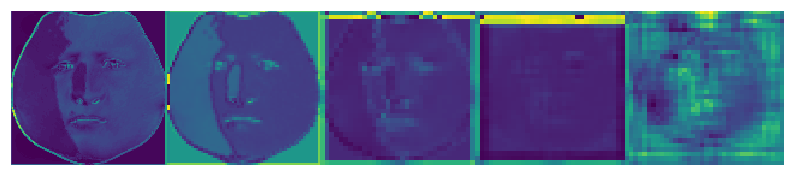

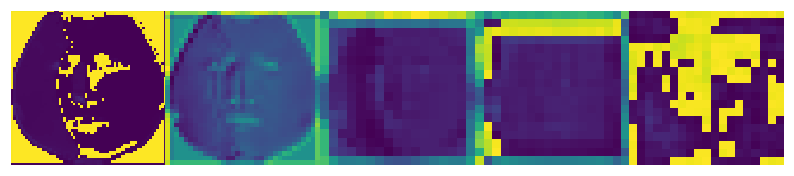

torch.Size([1, 64, 129, 129])
torch.Size([1, 128, 65, 65])
torch.Size([1, 256, 33, 33])
torch.Size([1, 512, 34, 34])
torch.Size([1, 1, 35, 35])


In [15]:
output_D = netD(input_D)

out_s0 = [output_D[0][i] for i in range(len(output_D[0]))]
out_s1 = [output_D[1][i] for i in range(len(output_D[1]))]

avg_out_s0 = [output_D[0][i].mean(1, keepdim=True) for i in range(len(output_D[0]))]
avg_out_s1 = [output_D[1][i].mean(1, keepdim=True) for i in range(len(output_D[1]))]

ims_s0 = [avg_out_s0[i].data.numpy()[0][0] * 255 for i in range(len(avg_out_s0))]
ims_s1 = [avg_out_s1[i].data.numpy()[0][0] * 255 for i in range(len(avg_out_s1))]

plot_ims(ims_s0)
plot_ims(ims_s1)

for i in out_s0: print(i.shape)

In [10]:
# LABELS: REAL IMAGE
def get_label_tensor(inp, target_is_real):
    real_label = 1.0
    fake_label = 0.0
    if target_is_real:
        real_tensor = torch.FloatTensor(inp.size()).fill_(real_label)
        label = Variable(real_tensor, requires_grad=False)
    else:
        fake_tensor = torch.FloatTensor(inp.size()).fill_(fake_label)
        label_var = Variable(fake_tensor, requires_grad=False)
    return label

labels = [get_label_tensor(output_D[0][i], True) for i in range(len(output_D[0]))]

In [17]:
# D0
# WE NEED TO HOOK THE WEIGHTS: AFTER EACH CONV2D
weights = {}
av_weights = {}

model = netD

wout_s0 = []
wout_sig_s0 = []
avg_wout_s0 = []
avg_wout_sig_s0 = []

out = input_D

def rescale_var(x):
    x = x.data.numpy()
    n_x = Variable(torch.FloatTensor((x - np.min(x)) / (np.max(x) - np.min(x))))
    return n_x

print(model(input_D)[0][4].min().data.numpy(), model(input_D)[0][4].max().data.numpy(), model(input_D)[0][4].shape)

for block_name, block in model._modules.items():
    for module_pos, module in block._modules.items():
        if block_name[:6] == 'scale0':
            print(block_name, module_pos, module)
            
            # 0. input of the layer
#             x = out
                
            # 1. output of the layer
            out = module(out)
            out = torch.nn.functional.sigmoid(out)


            print(out.min().data.numpy(), out.max().data.numpy(), out.shape)
                
#             if isinstance(module, torch.nn.modules.Conv2d): 
#             print(block_name, module_pos, module, x.shape)

#             if block_name == 'scale0_layer4':



                    # 2. weights
    #                 nw = module.weight
    #                 nw = torch.nn.functional.normalize(nw, dim=0, p=1)

#                     w = module.weight
#                     n_w = rescale_var(w)                

#                     aw = n_w.mean(2, keepdim=True).mean(3, keepdim=True)
#     #                 print('aw', aw.shape)
#     #                 aw = aw.mean(1, keepdim=True)
#     #                 aw = aw.view(1, -1, 1, 1)
#                     # rescale aw
#     #                 print('aw', aw.shape)
#                     n_aw = rescale_var(aw)
#                     print(out_sig.shape, n_aw.shape)

#                     # multiplication of output and weights (again?)
#                     wo = torch.mul(out_sig, n_aw)
#                     awo = wo.mean(2, keepdim=True).mean(3, keepdim=True)

#                     wi = torch.mul(awo, x)
#                     print(wi.shape)
#                     swi = wi.sum(1).unsqueeze(1) #keepdim=True)
#                     awi = wi.mean(1, keepdim=True)
#                     print(awi.shape, swi.shape)
        
# #                     print(swi.min(), awi.max())
# #                     print(awi.min(), awi.max())

# #                     print(swi.shape, awi.shape)
# #                     up_wcam = torch.nn.Upsample(scale_factor = 4, mode = "bilinear")(wcam)
# #                     print(x.shape, w.shape, out.shape )
                    
#             pout = out.mean(1, keepdim=True)
#             plot_im(pout.data.numpy()[0][0] * 255)
#                     
                    
#             else: out = module(out)
                    
                
                
#                 ### VISUALISATION OF INTERMEDIATE AM WEIGHTED BY WEIGHTES AND SIG()
#                 # resiszing and saving: np.mean(guided_gradients, axis=(1, 2))
#                 aw = module.weight.mean(2, keepdim=True).mean(3, keepdim=True)
#                 aw = aw.mean(1, keepdim=True)
#                 aw = aw.view(1, -1, 1, 1)
#                 weights[block_name] = aw
#                 # we can visualise "output 0" strored in 
#                 i = block_name[-1]
#                 o = out_s0[int(i)]
#                 o_sig = torch.nn.functional.sigmoid(o)
#                 print(o_sig.shape, module.weight.shape)
#                 # multiplication of output and weights (again?)
#                 wo = torch.mul(o, aw)
#                 wo_sig = torch.mul(o_sig, aw)
#                 # now we can visualise "output 1":
#                 wout_s0.append(wo)
#                 wout_sig_s0.append(wo_sig)
#                 avg_wout_s0.append(wo.mean(1, keepdim=True))
#                 avg_wout_sig_s0.append(wo_sig.mean(1, keepdim=True))
                
#                 print(wo_sig.shape)
                # weighted class activation map before the avg. pooling
#                 wcam = torch.mul(x, w.unsqueeze(2).unsqueeze(3))
#                 wcam = wcam.sum(1).unsqueeze(1)
#                 print('weighted cam shape ', wcam.shape)

#                 up_wcam = torch.nn.Upsample(scale_factor = 4, mode = "bilinear")(wcam)
#                 print("outputCAM (upsampled weighted cam) shape ", up_wcam.shape)

[ 0.45540106] [ 0.80553311] torch.Size([1, 1, 35, 35])
scale0_layer0 0 Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
[  8.71809243e-05] [ 0.99931145] torch.Size([1, 64, 129, 129])
scale0_layer0 1 LeakyReLU(0.2, inplace)
[ 0.50002182] [ 0.73092318] torch.Size([1, 64, 129, 129])
scale0_layer1 0 Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
[  3.93912437e-11] [ 1.] torch.Size([1, 128, 65, 65])
scale0_layer1 1 InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
[  4.19547920e-19] [ 1.] torch.Size([1, 128, 65, 65])
scale0_layer1 2 LeakyReLU(0.2, inplace)
[ 0.5] [ 0.7310586] torch.Size([1, 128, 65, 65])
scale0_layer2 0 Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
[  2.77239567e-20] [ 1.] torch.Size([1, 256, 33, 33])
scale0_layer2 1 InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
[  1.35098297e-08] [ 1.] torch.Size([1, 256, 33, 33])
scale0_layer2 2 LeakyReLU(0.2, inplace)
[ 0.5] [ 0.7310586] torch.Size([1, 256, 3

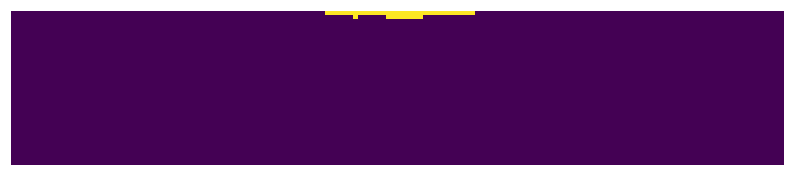

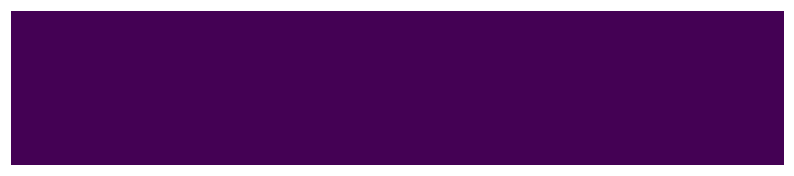

torch.Size([1, 64, 129, 129])
torch.Size([1, 128, 65, 65])
torch.Size([1, 256, 33, 33])
torch.Size([1, 512, 34, 34])
torch.Size([1, 1, 35, 35])


In [127]:
ims_avg_wout_s0 = [avg_wout_s0[i].data.numpy()[0][0] * 255 for i in range(len(avg_wout_s0))]
ims_avg_wout_sig_s0 = [avg_wout_sig_s0[i].data.numpy()[0][0] * 255 for i in range(len(avg_wout_sig_s0))]

plot_ims(ims_avg_wout_s0)
plot_ims(ims_avg_wout_sig_s0)

for i in wout_sig_s0: print(i.shape)

In [232]:
input_D.shape

torch.Size([1, 6, 256, 256])

In [133]:
np.min(avg_wout_sig_s0[0].data.numpy())
np.max(avg_wout_sig_s0[0].data.numpy())

0.00015982869

In [137]:
for i, j in weights.items():
    print(weights[i].shape)
    print(np.min(weights[i].data.numpy()), np.max(weights[i].data.numpy()))

torch.Size([1, 64, 1, 1])
-0.0146032 0.0115469
torch.Size([1, 128, 1, 1])
-0.037475 0.0290538
torch.Size([1, 256, 1, 1])
-0.0336559 0.0146094
torch.Size([1, 512, 1, 1])
-0.0252893 0.0141603
torch.Size([1, 1, 1, 1])
0.000192876 0.000192876


## 1. Weighted Class Activation Map
https://github.com/dimkastan/ATA-GAN/blob/master/DemoATAGan.py

In [ ]:
x = model.features(x_)
out = torch.nn.functional.relu(x, inplace=True)
out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1).view(out.size(0), -1)
out = model.classifier(out)
print('classifier output ', out.data.numpy())

outsm = torch.nn.functional.sigmoid(out)
print('classifier output sig ', outsm.data.numpy())

# weights weighted by the classification output 
# here we multiply the output of the sigmoid for each class to the weights of the linear function (1024) for each class
w = torch.mm(outsm, Variable(model.classifier.weight.data))
print('weighted weights shape', w.shape)

# weighted class activation map before the avg. pooling
wcam = torch.mul(x, w.unsqueeze(2).unsqueeze(3))
wcam = wcam.sum(1).unsqueeze(1)
print('weighted cam shape ', wcam.shape)

up_wcam = torch.nn.Upsample(scale_factor = 4, mode = "bilinear")(wcam)
print("outputCAM (upsampled weighted cam) shape ", up_wcam.shape)

# plot_im(up_wcam.data.numpy()[0][0])

In [35]:

model = netD
for block_name, block in model._modules.items():
    for module_pos, module in block._modules.items():
        print(block_name, module_pos, module)
        if not isinstance(module, torch.nn.modules.activation.LeakyReLU): 
            if module.weight is not None: print(module.weight.shape)


scale0_layer0 0 Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
torch.Size([64, 6, 4, 4])
scale0_layer0 1 LeakyReLU(0.2, inplace)
scale0_layer1 0 Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
torch.Size([128, 64, 4, 4])
scale0_layer1 1 InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
scale0_layer1 2 LeakyReLU(0.2, inplace)
scale0_layer2 0 Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
torch.Size([256, 128, 4, 4])
scale0_layer2 1 InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
scale0_layer2 2 LeakyReLU(0.2, inplace)
scale0_layer3 0 Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
torch.Size([512, 256, 4, 4])
scale0_layer3 1 InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False)
scale0_layer3 2 LeakyReLU(0.2, inplace)
scale0_layer4 0 Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
torch.Size([1, 512, 4, 4])
scale1_layer0 0 Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2

In [208]:
model = netD
for block_name, block in model._modules.items():
    for module_pos, module in block._modules.items():
        print(block_name, module_pos, module)
        if not isinstance(module, torch.nn.modules.activation.LeakyReLU): 
            if module.weight is not None: print(module.weight.shape)

scale0_layer0 0 Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
torch.Size([64, 6, 4, 4])
scale0_layer0 1 LeakyReLU(0.2, inplace)
scale0_layer1 0 Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
torch.Size([128, 64, 4, 4])
scale0_layer1 1 InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
scale0_layer1 2 LeakyReLU(0.2, inplace)
scale0_layer2 0 Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
torch.Size([256, 128, 4, 4])
scale0_layer2 1 InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
scale0_layer2 2 LeakyReLU(0.2, inplace)
scale0_layer3 0 Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
torch.Size([512, 256, 4, 4])
scale0_layer3 1 InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
scale0_layer3 2 LeakyReLU(0.2, inplace)
scale0_layer4 0 Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
torch.Size(

In [ ]:
## VISUALIZING DENSENET with 80% accuracy

In [ ]:
# # one_hot_output
# label = networks_utils.GANLoss().get_target_tensor(x , True)
# print(label, type(label))

# # is the same as..
# label_code = 1.0
# label = torch.FloatTensor(x.size()).fill_(label_code)
# label_var = Variable(label, requires_grad=False)

# print(label, label_var, type(label), type(label_var)) 